In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
from random import randint
import scipy.stats as sts
import plotly.express as px
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings('ignore')

df = pd.read_csv('primary-tumor.data', on_bad_lines='skip', header=None)
df.rename(columns={0: 'class', 1: 'age', 2: 'sex', 3: 'histologic-type', 4: 'degree-of-diffe', 5: 'bone', 6: 'bone-marrow', 7: 'lung', 8: 'pleura', 9: 'peritoneum', 10: 'liver', 11: 'brain', 12: 'skin', 13: 'neck', 14: 'supraclavicular', 15: 'axillar', 16: 'mediastinum', 17: 'abdominal'}, inplace=True)
df.drop(['histologic-type','degree-of-diffe'], axis = 1, inplace=True)

SexIndexes = df.index[df['sex'].str.match('\?')].tolist()
for index in SexIndexes:
  if (df.iloc[index])['class'] == '22' or (df.iloc[index])['class'] == '21' or (df.iloc[index])['class'] == '20' or (df.iloc[index])['class'] == '19':
    df.at[index, 'sex'] = 2
  elif (df.iloc[index])['class'] == '18' or (df.iloc[index])['class'] == '17' or (df.iloc[index])['class'] == '16':
    df.at[index, 'sex'] = 1
  else:
    df.at[index, 'sex'] = randint(1,2)
df['sex'] = pd.to_numeric(df['sex'])

SkinIndexes = df.index[df['skin'].str.match('\?')].tolist()
for index in SkinIndexes:
  df.at[index, 'skin'] = randint(1,2)
df['skin'] = pd.to_numeric(df['skin'])

AxillarIndexes = df.index[df['axillar'].str.match('\?')].tolist()
for index in AxillarIndexes:
  df.at[index, 'axillar'] = randint(1,2)
df['axillar'] = pd.to_numeric(df['axillar'])

df

,class,age,sex,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,1,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2
1,1,1,1,2,2,2,2,2,1,2,2,2,1,2,1,2
2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,1,2,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,1,2,1,2,1,1,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,22,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2
335,22,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2
336,22,2,2,1,2,2,2,2,2,2,2,2,1,1,2,2
337,22,3,2,2,2,2,2,2,2,2,2,1,1,1,2,2


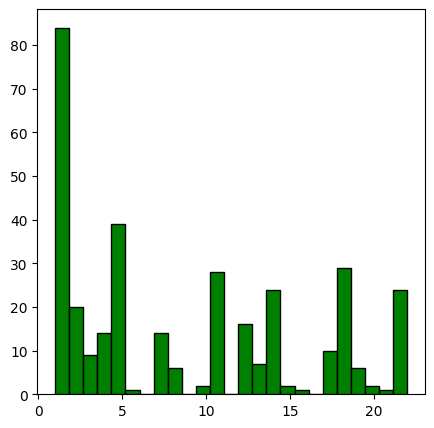

1     84
5     39
18    29
11    28
14    24
22    24
2     20
12    16
7     14
4     14
17    10
3      9
13     7
8      6
19     6
10     2
15     2
20     2
6      1
16     1
21     1
Name: class, dtype: int64

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.hist(df['class'], edgecolor = 'black', color='green', bins=25)
plt.show()
df['class'].value_counts()

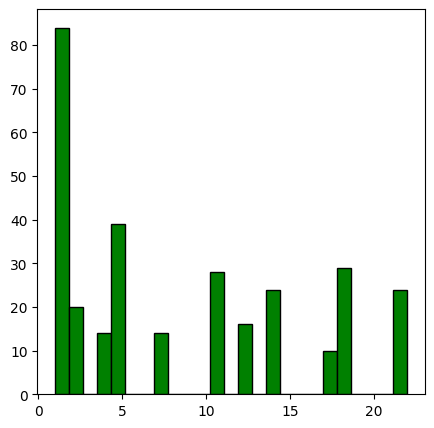

1     84
5     39
18    29
11    28
14    24
22    24
2     20
12    16
4     14
7     14
17    10
Name: class, dtype: int64

In [ ]:
deleteArray = []
for index, row in df.iterrows():
  if df['class'][index] == 21:
    deleteArray.append(index)
  if df['class'][index] == 16:
    deleteArray.append(index)
  if df['class'][index] == 6:
    deleteArray.append(index)
  if df['class'][index] == 20:
    deleteArray.append(index)
  if df['class'][index] == 15:
    deleteArray.append(index)
  if df['class'][index] == 10:
    deleteArray.append(index)
  if df['class'][index] == 3:
    deleteArray.append(index)
  if df['class'][index] == 13:
    deleteArray.append(index)
  if df['class'][index] == 8:
    deleteArray.append(index)
  if df['class'][index] == 19:
    deleteArray.append(index)

#print(deleteArray)
df.drop(index = deleteArray, inplace=True)

fig, ax = plt.subplots(figsize = (5, 5))
ax.hist(df['class'], edgecolor = 'black', color='green', bins=25)
plt.show()
df['class'].value_counts()

In [ ]:
dfX = df.copy()

dfX.drop(['class'], axis = 1, inplace=True)

dfX

,age,sex,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2
1,1,1,2,2,2,2,2,1,2,2,2,1,2,1,2
2,1,2,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,2,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,2,1,2,1,1,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2
335,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2
336,2,2,1,2,2,2,2,2,2,2,2,1,1,2,2
337,3,2,2,2,2,2,2,2,2,2,1,1,1,2,2


In [ ]:
dfY = df['class']

dfY

0       1
1       1
2       1
3       1
4       1
       ..
334    22
335    22
336    22
337    22
338    22
Name: class, Length: 302, dtype: int64

# ПУНКТ 1: **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_res, y_res = sm.fit_resample(dfX, dfY)

x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.8, shuffle=True)

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)

pca = PCA(n_components=2).fit(x_train)
pca_2d_test = pca.transform(x_test)

In [ ]:
param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel':param_kernel, 'C': [1,10]}
model=SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
grid_search_svm.fit(pca_2d, y_train)

best_model = grid_search_svm.best_estimator_
best_model.kernel

'rbf'

In [ ]:
print(best_model.support_.size)

618


In [ ]:
svm_preds = best_model.predict(pca_2d_test)
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           1       0.44      0.27      0.33        15
           2       0.91      0.77      0.83        13
           4       0.79      0.58      0.67        19
           5       1.00      0.16      0.27        19
           7       0.30      0.54      0.39        13
          11       0.45      0.56      0.50        16
          12       0.73      0.89      0.80        18
          14       0.43      0.87      0.58        15
          17       0.68      0.65      0.67        20
          18       0.64      0.50      0.56        18
          22       0.50      0.53      0.51        19

    accuracy                           0.57       185
   macro avg       0.63      0.57      0.56       185
weighted avg       0.64      0.57      0.56       185



In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(pca_2d)

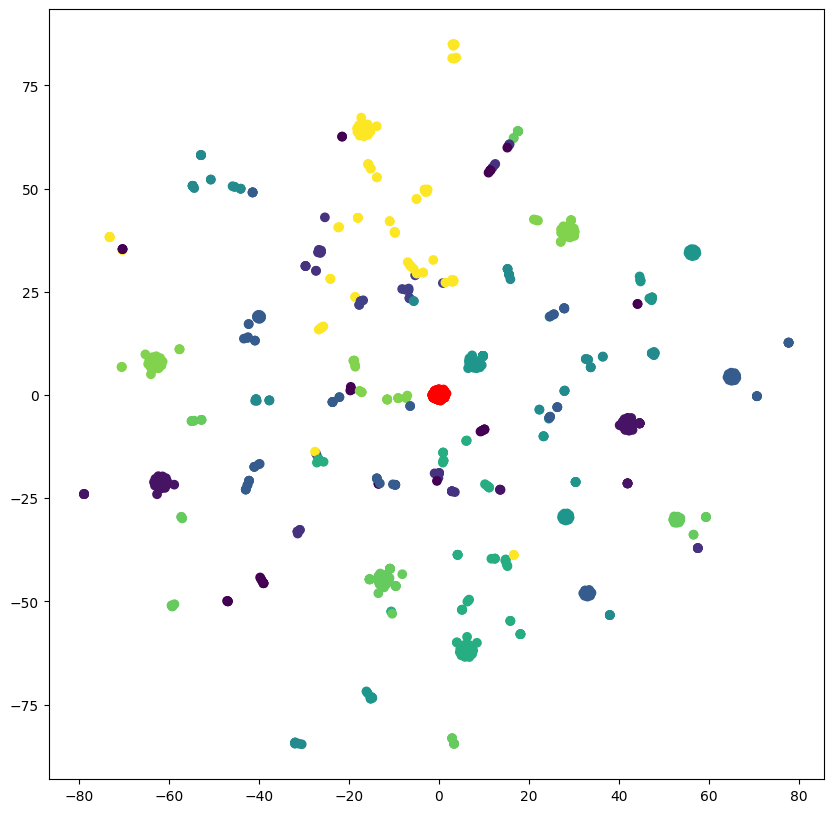

In [ ]:
support_vectors = best_model.support_vectors_

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=best_model.predict(pca_2d))
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.show()

In [ ]:
!pip install umap-learn
import umap

In [ ]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(pca_2d)

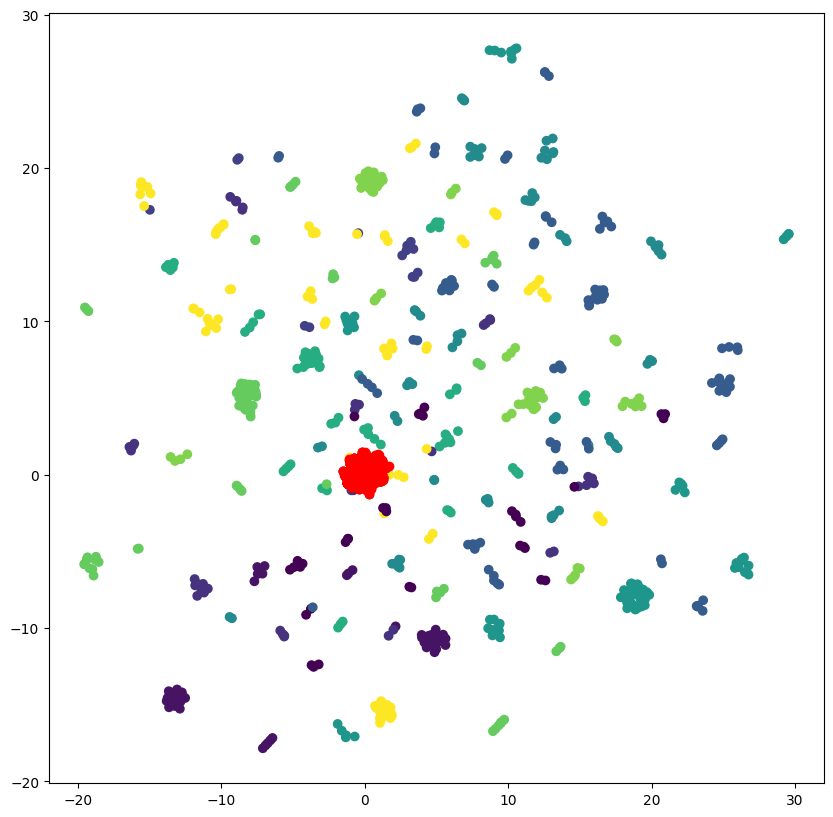

In [ ]:
plt.scatter(u[:,0], u[:,1], c=best_model.predict(pca_2d))
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, svm_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
fig.show()

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

radius = np.arange(1.0, 100.0)
model_KNN = RadiusNeighborsClassifier()
params = {"radius":radius}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)

grid_search.fit(pca_2d, y_train)

print(grid_search.best_score_)

print(grid_search.best_estimator_)

#knn_preds = grid_search.predict(pca_2d_test)

#print(classification_report(y_test, knn_preds))

0.32878748142320136
RadiusNeighborsClassifier()


In [ ]:
number_of_neighbors = np.arange(3, 10)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors":number_of_neighbors}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)

grid_search.fit(pca_2d, y_train)

print(grid_search.best_score_)

print(grid_search.best_estimator_)

knn_preds = grid_search.predict(pca_2d_test)

print(classification_report(y_test, knn_preds))

0.6416207710464201
KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           1       0.29      0.27      0.28        15
           2       1.00      0.85      0.92        13
           4       0.76      0.84      0.80        19
           5       0.50      0.47      0.49        19
           7       0.56      0.69      0.62        13
          11       0.60      0.38      0.46        16
          12       0.79      0.83      0.81        18
          14       0.65      0.73      0.69        15
          17       0.86      0.95      0.90        20
          18       0.80      0.67      0.73        18
          22       0.82      0.95      0.88        19

    accuracy                           0.70       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.70      0.70      0.70       185



In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(pca_2d)

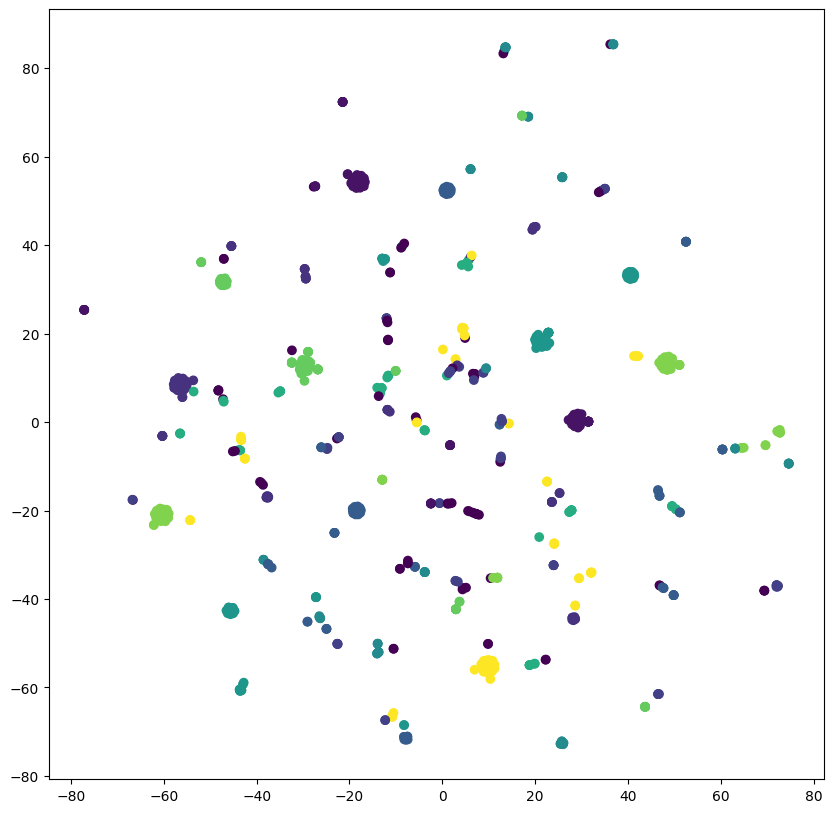

In [ ]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=grid_search.predict(pca_2d))
plt.show()

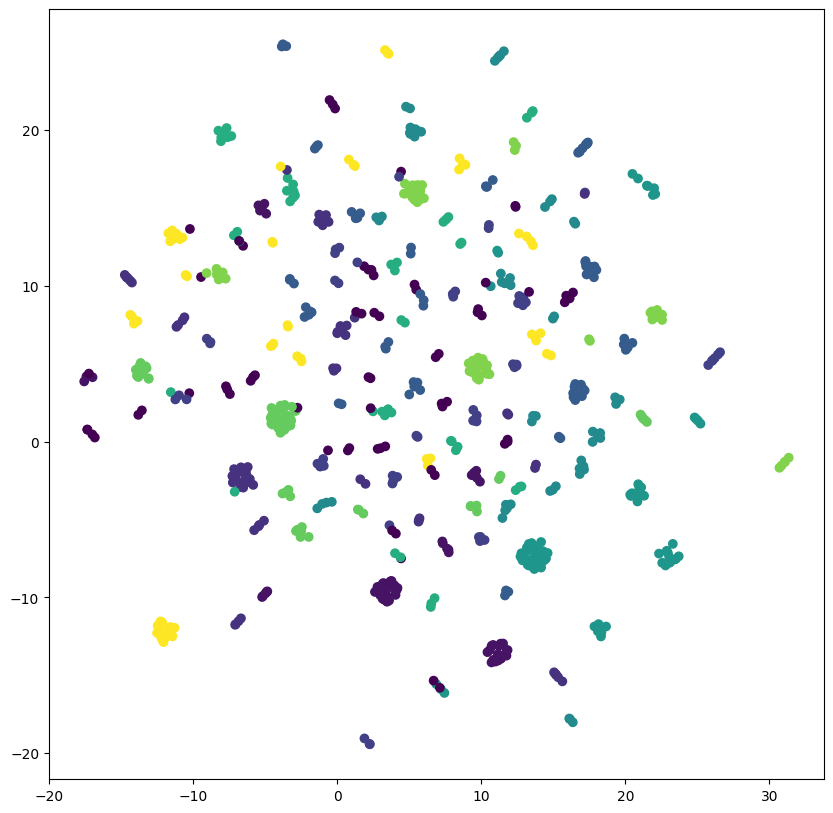

In [ ]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(pca_2d)

plt.scatter(u[:,0], u[:,1], c=grid_search.predict(pca_2d))
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, knn_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
fig.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

params_grid = {
    'max_depth': [2, 30],
    'min_samples_leaf': [3, 15],
    'min_samples_split': [3, 15],
}

grid_search_random_forest = GridSearchCV(estimator=random_forest, param_grid = params_grid, scoring = 'f1_macro', cv=6)

grid_search_random_forest.fit(pca_2d, y_train)

best_model = grid_search_random_forest.best_estimator_

In [ ]:
RF_preds = grid_search_random_forest.predict(pca_2d_test)

print(classification_report(y_test, RF_preds))

              precision    recall  f1-score   support

           1       0.45      0.33      0.38        15
           2       1.00      0.85      0.92        13
           4       0.88      0.79      0.83        19
           5       0.75      0.32      0.44        19
           7       0.50      0.62      0.55        13
          11       0.53      0.56      0.55        16
          12       0.76      0.89      0.82        18
          14       0.65      0.87      0.74        15
          17       0.87      1.00      0.93        20
          18       0.83      0.83      0.83        18
          22       0.74      0.89      0.81        19

    accuracy                           0.73       185
   macro avg       0.72      0.72      0.71       185
weighted avg       0.73      0.73      0.72       185



In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(pca_2d)

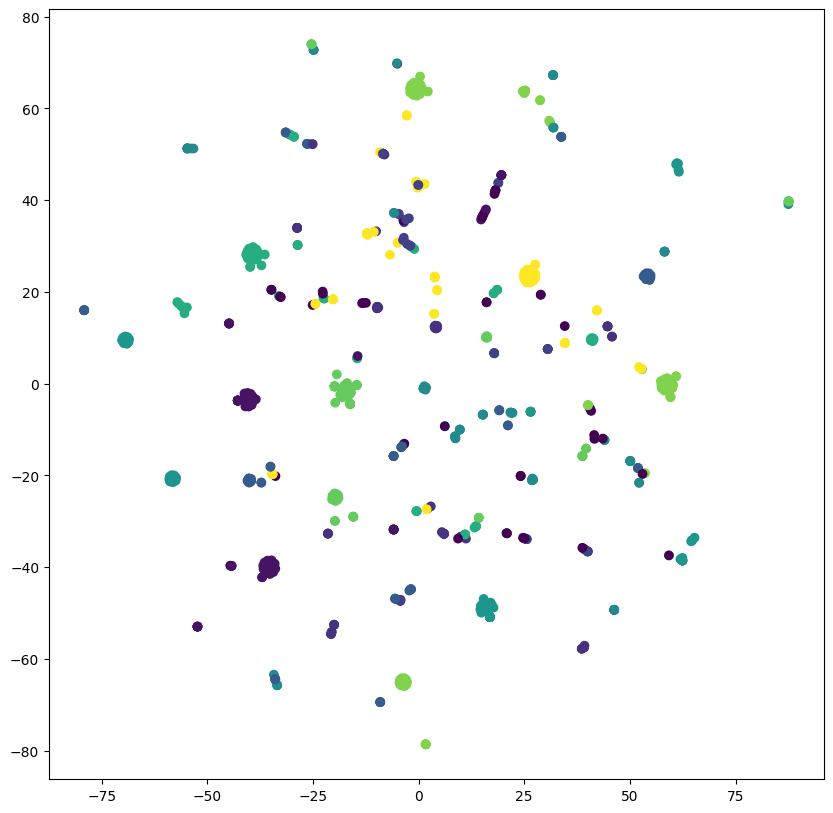

In [ ]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=grid_search_random_forest.predict(pca_2d))
plt.show()

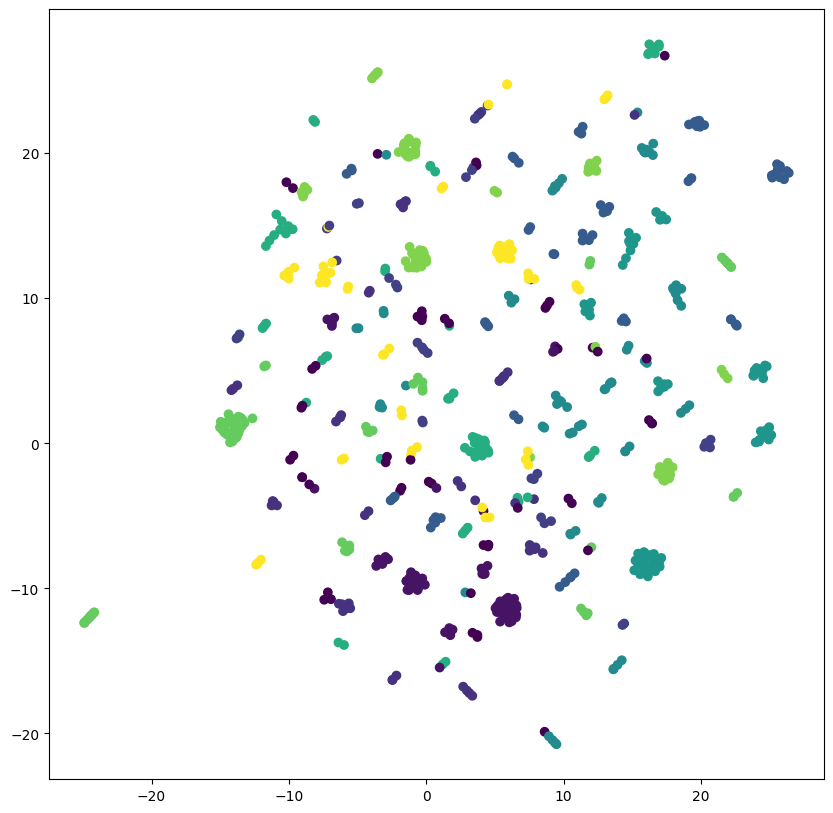

In [ ]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(pca_2d)

plt.scatter(u[:,0], u[:,1], c=grid_search_random_forest.predict(pca_2d))
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, RF_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
fig.show()

# ПУНКТ 2: **borderline-SMOTE**

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

sm = BorderlineSMOTE(kind='borderline-1')
X_res, y_res = sm.fit_resample(dfX, dfY)

x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.8, shuffle=True)

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)

pca = PCA(n_components=2).fit(x_train)
pca_2d_test = pca.transform(x_test)

In [ ]:
param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel':param_kernel, 'C': [1,10]}
model=SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
grid_search_svm.fit(pca_2d, y_train)

best_model = grid_search_svm.best_estimator_
best_model.kernel

'rbf'

In [ ]:
print(best_model.support_.size)

619


In [ ]:
svm_preds = best_model.predict(pca_2d_test)
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           1       0.43      0.19      0.26        16
           2       0.87      0.93      0.90        14
           4       0.62      0.84      0.71        19
           5       0.14      0.07      0.09        15
           7       0.35      0.50      0.41        12
          11       0.41      0.47      0.44        19
          12       0.71      0.53      0.61        19
          14       0.67      0.24      0.35        17
          17       0.56      0.69      0.62        26
          18       0.64      0.82      0.72        17
          22       0.53      0.82      0.64        11

    accuracy                           0.56       185
   macro avg       0.54      0.55      0.52       185
weighted avg       0.55      0.56      0.53       185



In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(pca_2d)

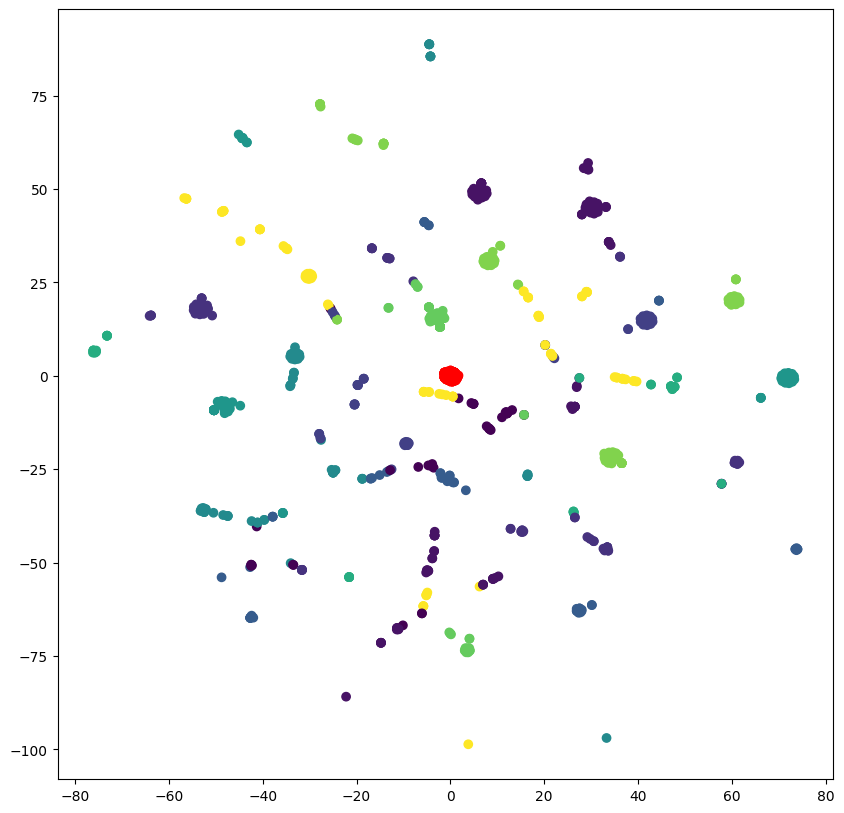

In [ ]:
support_vectors = best_model.support_vectors_

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=best_model.predict(pca_2d))
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.show()

In [ ]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(pca_2d)

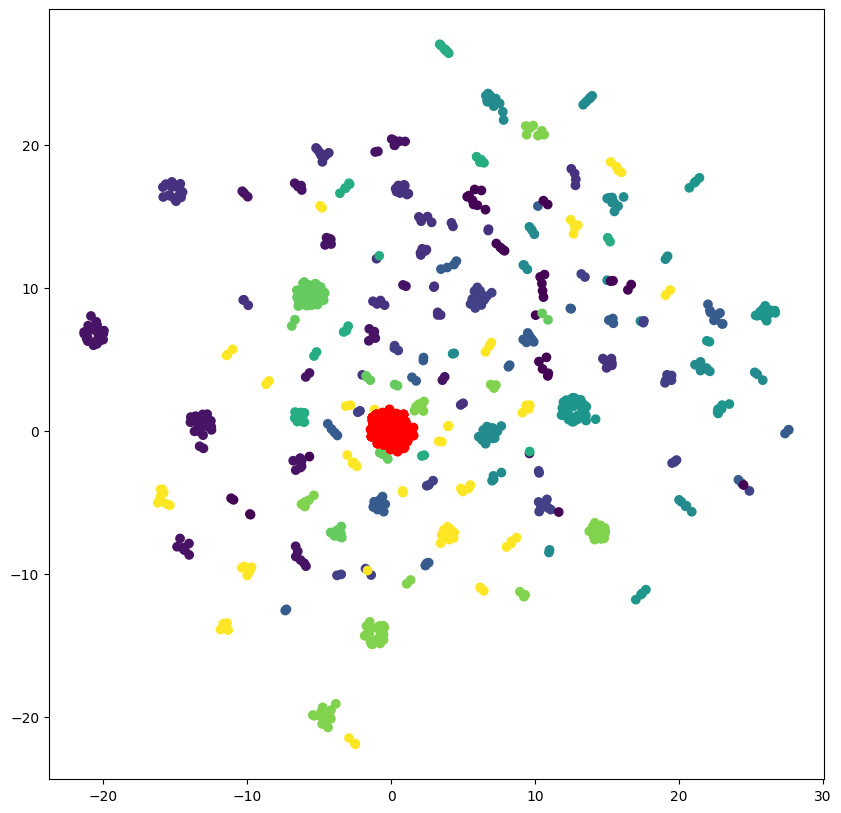

In [ ]:
plt.scatter(u[:,0], u[:,1], c=best_model.predict(pca_2d))
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, svm_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
fig.show()

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

radius = np.arange(1.0, 100.0)
model_KNN = RadiusNeighborsClassifier()
params = {"radius":radius}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)

grid_search.fit(pca_2d, y_train)

print(grid_search.best_score_)

print(grid_search.best_estimator_)

#knn_preds = grid_search.predict(pca_2d_test)

#print(classification_report(y_test, knn_preds))

0.31934609668677333
RadiusNeighborsClassifier()


In [ ]:
number_of_neighbors = np.arange(3, 10)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors":number_of_neighbors}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)

grid_search.fit(pca_2d, y_train)

print(grid_search.best_score_)

print(grid_search.best_estimator_)

knn_preds = grid_search.predict(pca_2d_test)

print(classification_report(y_test, knn_preds))

0.6238088993793164
KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           1       0.37      0.44      0.40        16
           2       0.93      1.00      0.97        14
           4       0.83      0.79      0.81        19
           5       0.42      0.33      0.37        15
           7       0.89      0.67      0.76        12
          11       0.54      0.74      0.62        19
          12       0.75      0.63      0.69        19
          14       0.73      0.47      0.57        17
          17       0.75      0.81      0.78        26
          18       0.75      0.88      0.81        17
          22       0.91      0.91      0.91        11

    accuracy                           0.70       185
   macro avg       0.72      0.70      0.70       185
weighted avg       0.71      0.70      0.70       185



In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(pca_2d)

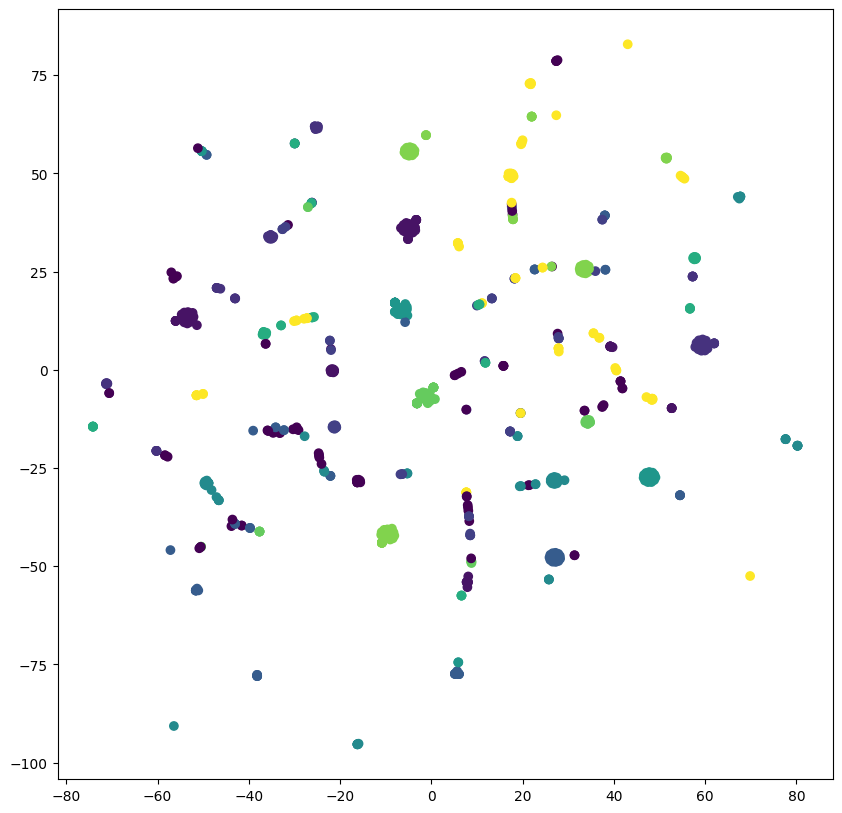

In [ ]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=grid_search.predict(pca_2d))
plt.show()

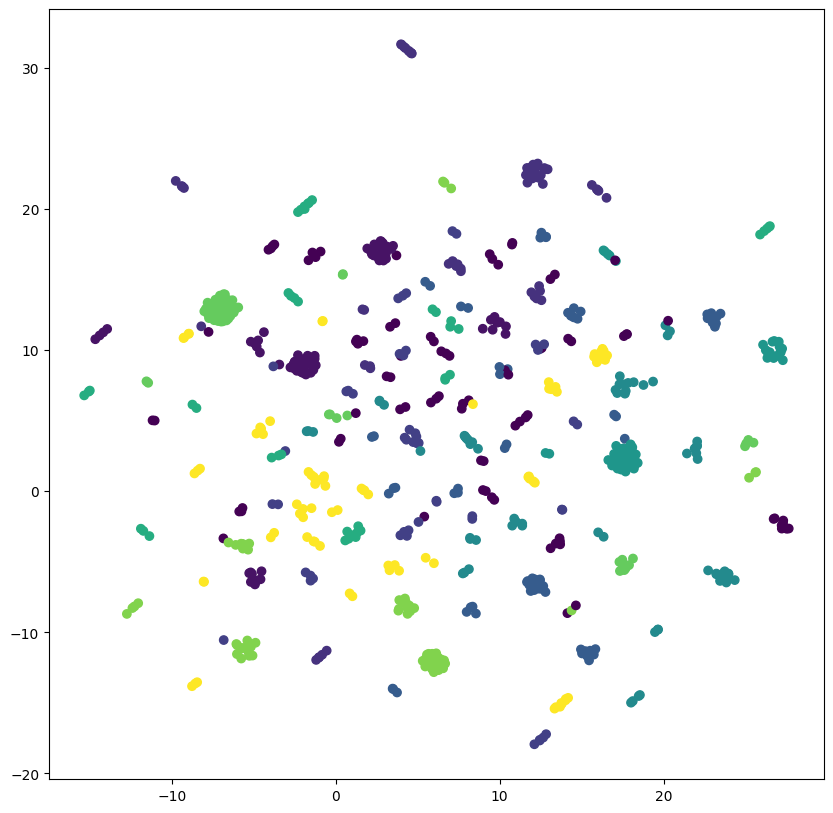

In [ ]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(pca_2d)

plt.scatter(u[:,0], u[:,1], c=grid_search.predict(pca_2d))
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, knn_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
fig.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

params_grid = {
    'max_depth': [2, 30],
    'min_samples_leaf': [3, 15],
    'min_samples_split': [3, 15],
}

grid_search_random_forest = GridSearchCV(estimator=random_forest, param_grid = params_grid, scoring = 'f1_macro', cv=6)

grid_search_random_forest.fit(pca_2d, y_train)

best_model = grid_search_random_forest.best_estimator_

In [ ]:
RF_preds = grid_search_random_forest.predict(pca_2d_test)

print(classification_report(y_test, RF_preds))

              precision    recall  f1-score   support

           1       0.40      0.38      0.39        16
           2       0.93      1.00      0.97        14
           4       0.71      0.89      0.79        19
           5       0.86      0.40      0.55        15
           7       0.62      0.67      0.64        12
          11       0.58      0.79      0.67        19
          12       0.71      0.53      0.61        19
          14       0.78      0.41      0.54        17
          17       0.76      0.85      0.80        26
          18       0.75      0.88      0.81        17
          22       0.85      1.00      0.92        11

    accuracy                           0.71       185
   macro avg       0.72      0.71      0.70       185
weighted avg       0.72      0.71      0.70       185



In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(pca_2d)

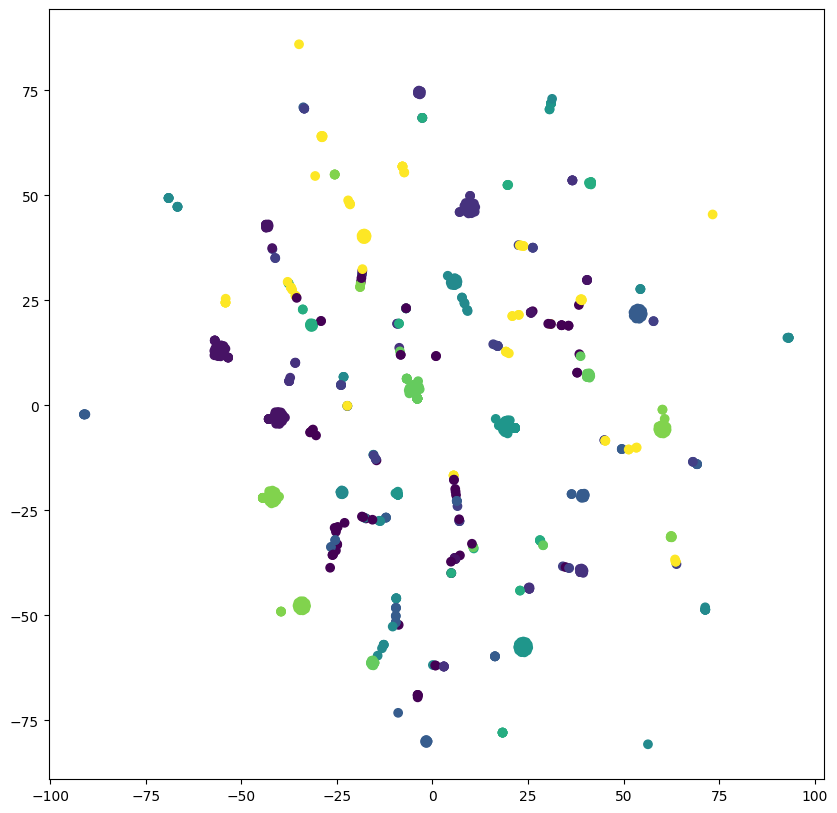

In [ ]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=grid_search_random_forest.predict(pca_2d))
plt.show()

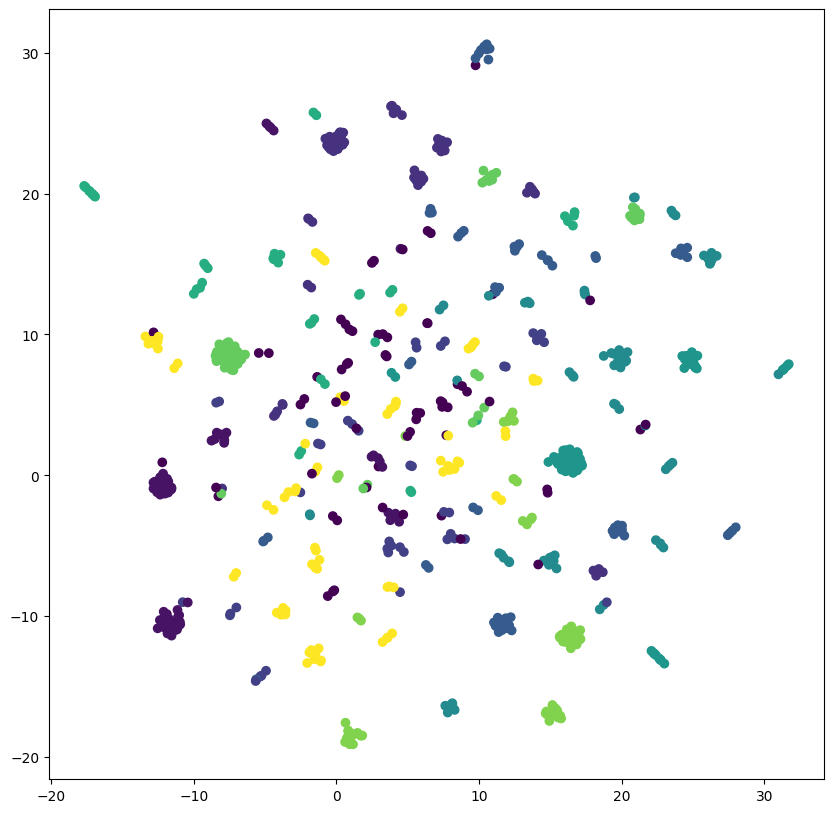

In [ ]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(pca_2d)

plt.scatter(u[:,0], u[:,1], c=grid_search_random_forest.predict(pca_2d))
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, RF_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
fig.show()

# ПУНКТ 3: **borderline-SMOTE2**

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

sm = BorderlineSMOTE(kind='borderline-2')
X_res, y_res = sm.fit_resample(dfX, dfY)

x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.8, shuffle=True)

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)

pca = PCA(n_components=2).fit(x_train)
pca_2d_test = pca.transform(x_test)

In [ ]:
param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel':param_kernel, 'C': [1,10]}
model=SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
grid_search_svm.fit(pca_2d, y_train)

best_model = grid_search_svm.best_estimator_
best_model.kernel

'rbf'

In [ ]:
print(best_model.support_.size)

684


In [ ]:
svm_preds = best_model.predict(pca_2d_test)
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

           1       0.28      0.33      0.30        15
           2       0.48      0.86      0.62        14
           4       0.48      0.65      0.55        17
           5       0.10      0.05      0.06        22
           7       0.30      0.18      0.22        17
          11       0.46      0.43      0.44        14
          12       0.52      0.75      0.62        16
          14       0.35      0.35      0.35        20
          17       0.29      0.33      0.31        12
          18       0.46      0.65      0.54        17
          22       0.00      0.00      0.00        21

    accuracy                           0.39       185
   macro avg       0.34      0.42      0.36       185
weighted avg       0.32      0.39      0.34       185



In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(pca_2d)

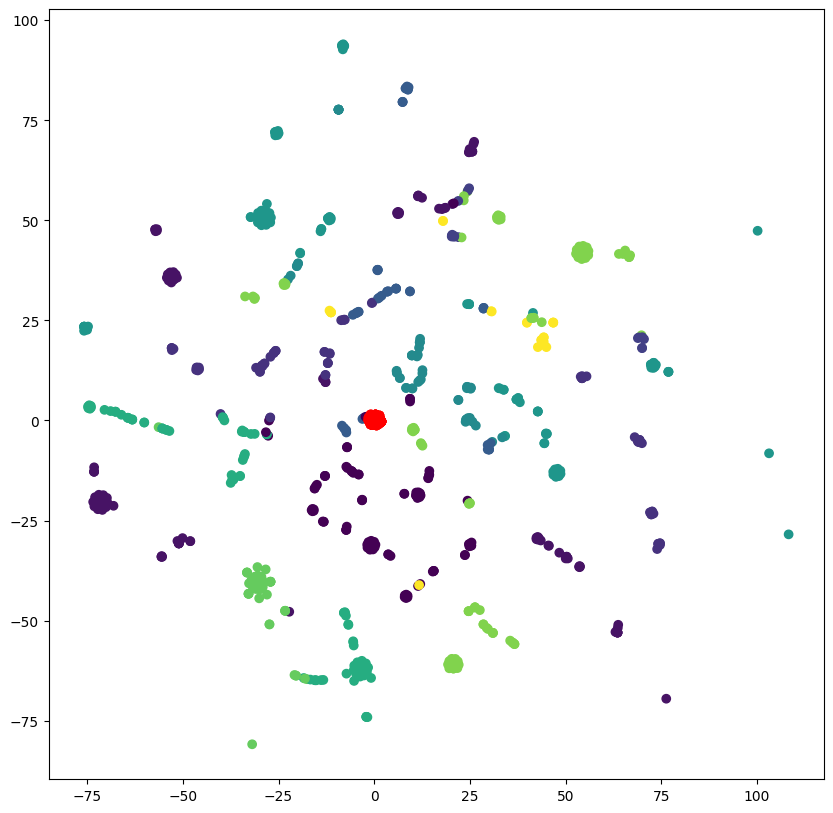

In [ ]:
support_vectors = best_model.support_vectors_

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=best_model.predict(pca_2d))
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.show()

In [ ]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(pca_2d)

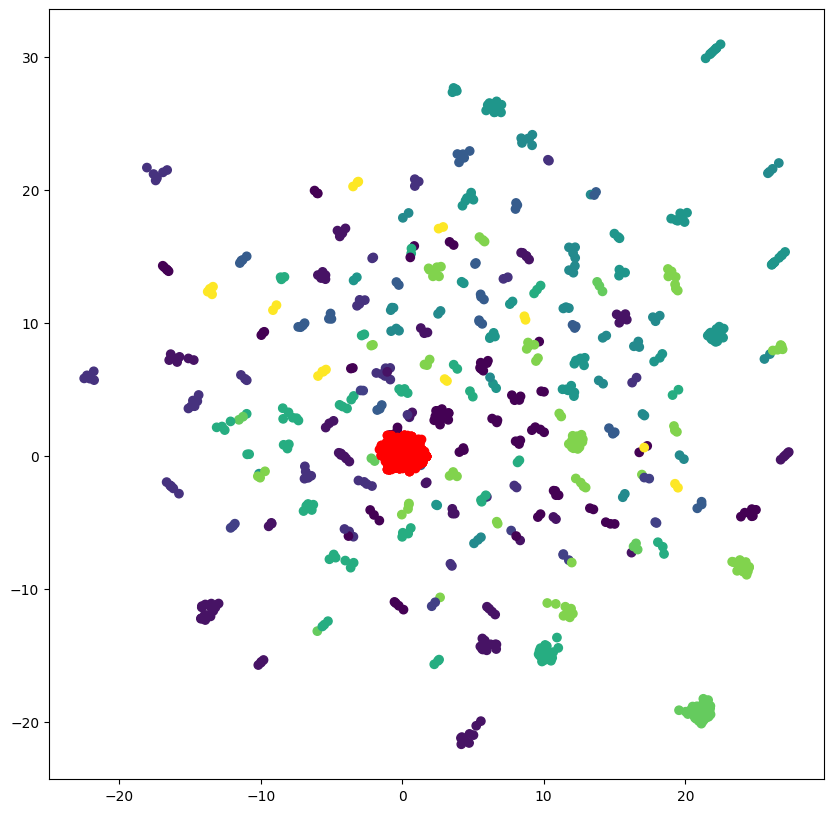

In [ ]:
plt.scatter(u[:,0], u[:,1], c=best_model.predict(pca_2d))
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, svm_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
fig.show()

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

radius = np.arange(1.0, 100.0)
model_KNN = RadiusNeighborsClassifier()
params = {"radius":radius}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)

grid_search.fit(pca_2d, y_train)

print(grid_search.best_score_)

print(grid_search.best_estimator_)

#knn_preds = grid_search.predict(pca_2d_test)

#print(classification_report(y_test, knn_preds))

0.25686392109822737
RadiusNeighborsClassifier()


In [ ]:
number_of_neighbors = np.arange(3, 10)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors":number_of_neighbors}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)

grid_search.fit(pca_2d, y_train)

print(grid_search.best_score_)

print(grid_search.best_estimator_)

knn_preds = grid_search.predict(pca_2d_test)

print(classification_report(y_test, knn_preds))

0.4864720778355324
KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           1       0.14      0.20      0.16        15
           2       0.68      0.93      0.79        14
           4       0.39      0.71      0.50        17
           5       0.15      0.09      0.11        22
           7       0.29      0.29      0.29        17
          11       0.47      0.50      0.48        14
          12       0.71      0.75      0.73        16
          14       0.44      0.35      0.39        20
          17       0.40      0.17      0.24        12
          18       0.59      0.59      0.59        17
          22       1.00      0.62      0.76        21

    accuracy                           0.46       185
   macro avg       0.48      0.47      0.46       185
weighted avg       0.48      0.46      0.46       185



In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(pca_2d)

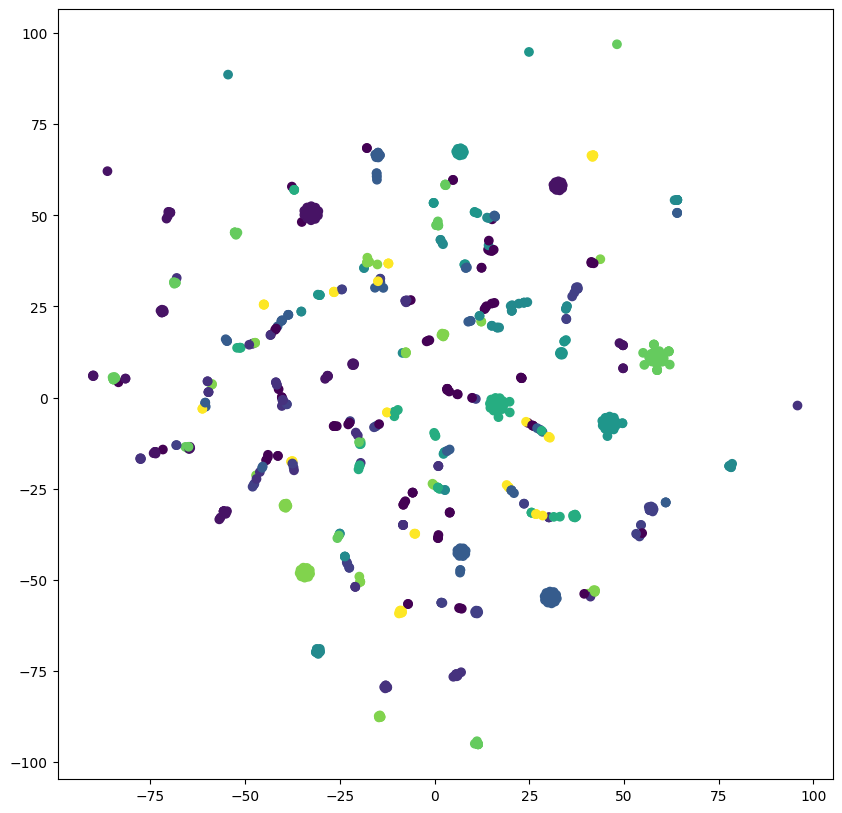

In [ ]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=grid_search.predict(pca_2d))
plt.show()

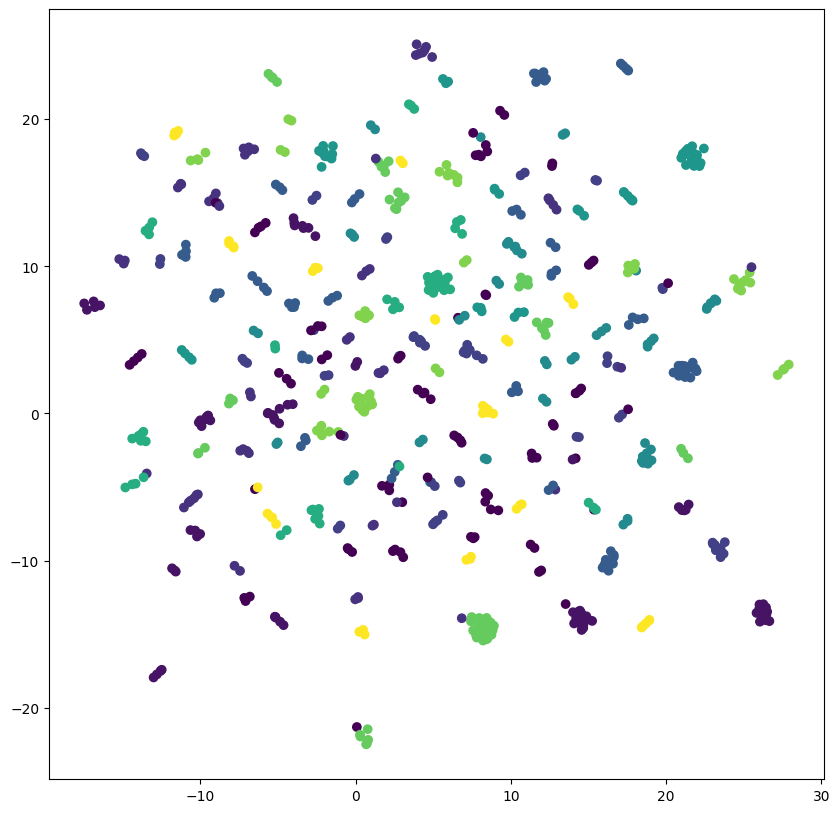

In [ ]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(pca_2d)

plt.scatter(u[:,0], u[:,1], c=grid_search.predict(pca_2d))
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, knn_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
fig.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

params_grid = {
    'max_depth': [2, 30],
    'min_samples_leaf': [3, 15],
    'min_samples_split': [3, 15],
}

grid_search_random_forest = GridSearchCV(estimator=random_forest, param_grid = params_grid, scoring = 'f1_macro', cv=6)

grid_search_random_forest.fit(pca_2d, y_train)

best_model = grid_search_random_forest.best_estimator_

In [ ]:
RF_preds = grid_search_random_forest.predict(pca_2d_test)

print(classification_report(y_test, RF_preds))

              precision    recall  f1-score   support

           1       0.31      0.33      0.32        15
           2       0.65      0.93      0.76        14
           4       0.68      0.76      0.72        17
           5       0.27      0.14      0.18        22
           7       0.47      0.47      0.47        17
          11       0.47      0.57      0.52        14
          12       0.67      0.88      0.76        16
          14       0.78      0.35      0.48        20
          17       0.46      0.50      0.48        12
          18       0.59      0.76      0.67        17
          22       0.70      0.67      0.68        21

    accuracy                           0.56       185
   macro avg       0.55      0.58      0.55       185
weighted avg       0.55      0.56      0.54       185



In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(pca_2d)

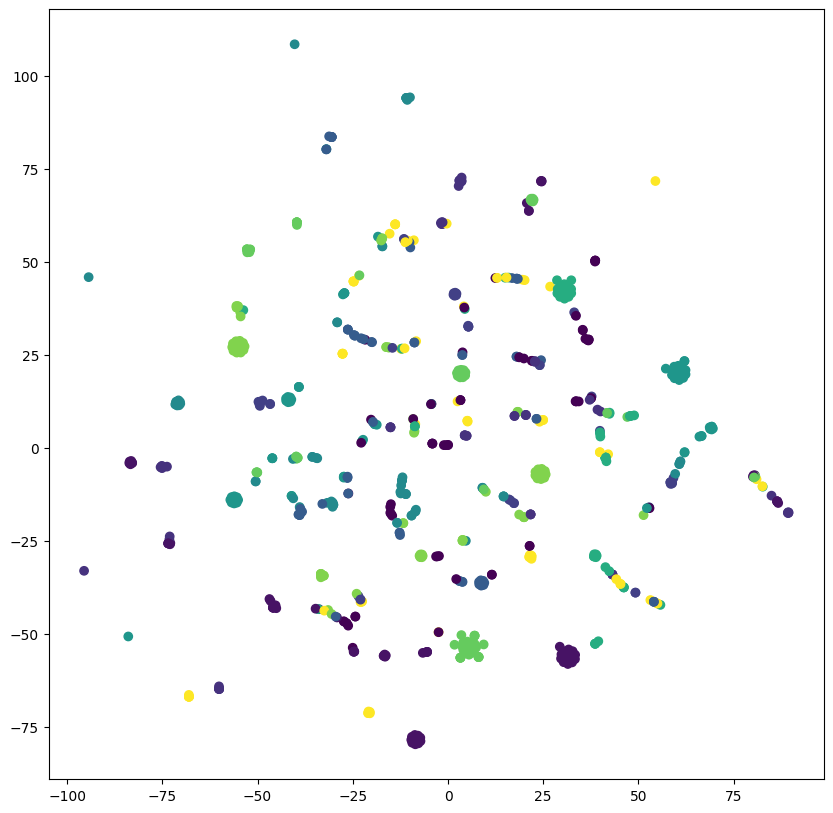

In [ ]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=grid_search_random_forest.predict(pca_2d))
plt.show()

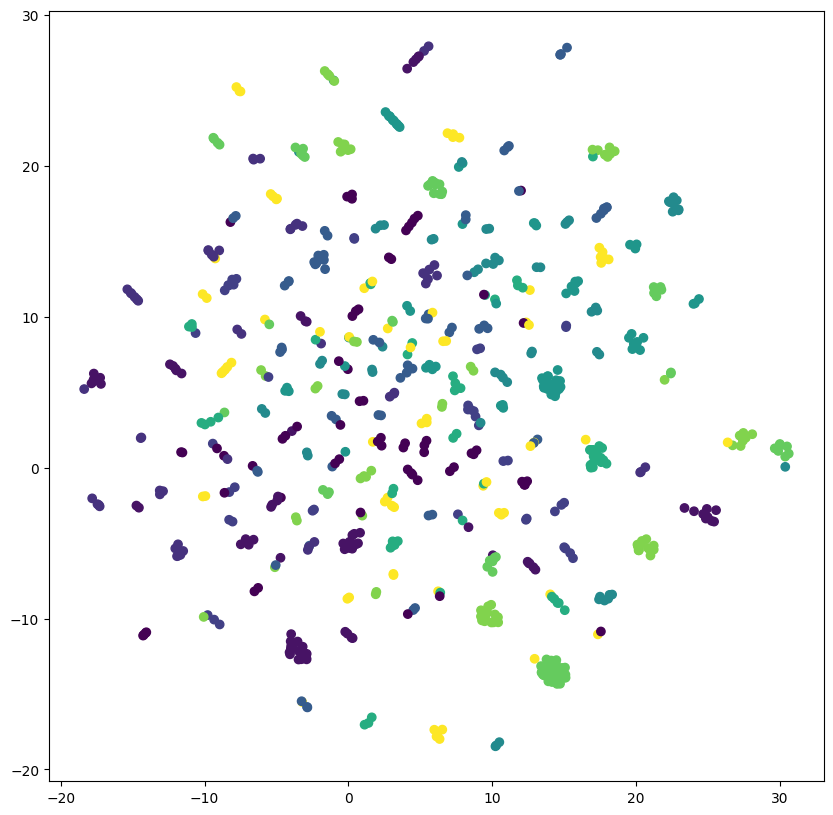

In [ ]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(pca_2d)

plt.scatter(u[:,0], u[:,1], c=grid_search_random_forest.predict(pca_2d))
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, RF_preds), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')
fig.show()